In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
T_tr = pd.read_csv(r'/kaggle/input/titanic/train.csv')
T_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
(pd.crosstab(T_tr['Survived'], T_tr['Pclass']))

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [4]:
(pd.crosstab(T_tr['Survived'], T_tr['Sex']))

Sex,female,male
Survived,,
0,81,468
1,233,109


In [5]:
(pd.crosstab(T_tr['Survived'], T_tr['Parch']))

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [6]:
(pd.crosstab(T_tr['Survived'], T_tr['SibSp']))

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [7]:
(pd.crosstab(T_tr['Survived'], [T_tr['Pclass'],T_tr['Sex']]))

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

In [8]:
Cont_var=['Fare', 'Age', 'Pclass','Survived', 'Embarked']
T_tr_c=T_tr[Cont_var]
T_tr_c.corr()

,Fare,Age,Pclass,Survived
Fare,1.000000,0.096067,-0.549500,0.257307
Age,0.096067,1.000000,-0.369226,-0.077221
Pclass,-0.549500,-0.369226,1.000000,-0.338481
Survived,0.257307,-0.077221,-0.338481,1.000000


<AxesSubplot:>

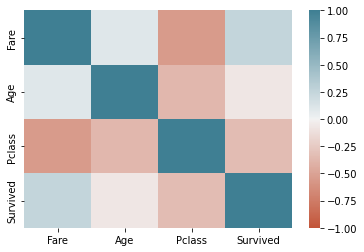

In [9]:
import seaborn as sns
sns.heatmap(T_tr_c.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

The `Fare` and `Age` variables are continous varaibles. Though the `Survived` 

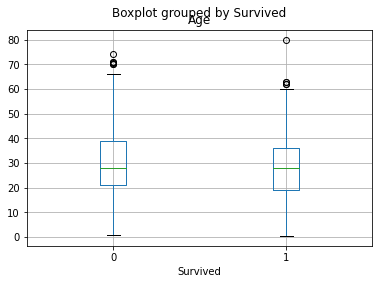

In [10]:
 ax=T_tr_c.boxplot(by='Survived', column=['Age'])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

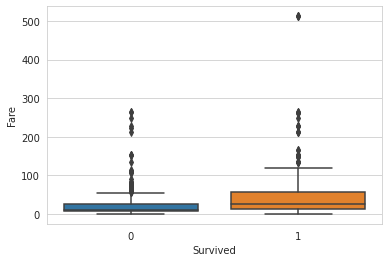

In [11]:
sns.set_style('whitegrid')
sns.boxplot(x="Survived", y='Fare',data=T_tr)

We Define `X` and `y`

In [12]:
subset=['Pclass', 'Parch','SibSp', 'Sex','Embarked', 'Fare','Survived']
T_tr_sub=T_tr[subset]

T_tr_sub=T_tr_sub.dropna()

T_tr_sub.head()

,Pclass,Parch,SibSp,Sex,Embarked,Fare,Survived
0,3,0,1,male,S,7.2500,0
1,1,0,1,female,C,71.2833,1
2,3,0,0,female,S,7.9250,1
3,1,0,1,female,S,53.1000,1
4,3,0,0,male,S,8.0500,0


In [13]:
predictors=['Pclass', 'Parch','SibSp', 'Sex','Embarked', 'Fare']
subs=['Pclass', 'Parch','SibSp', 'Sex','Embarked']
T_tr_subss=T_tr_sub[subs]
X=pd.get_dummies(T_tr_subss,drop_first=True, columns=T_tr_subss.columns)
X=pd.concat([X, T_tr_sub[['Fare']]], axis=1)
Outcome='Survived'
Y=T_tr_sub[Outcome]

X.head()

,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_male,Embarked_Q,Embarked_S,Fare
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,7.2500
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,71.2833
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.9250
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,53.1000
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,8.0500


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.25,random_state=0)
xtsh=x_train.shape
ytsh=y_train.shape
print(xtsh, ytsh)

(666, 18) (666,)


In [15]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X=x_train,y=y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [16]:
pred = pd.DataFrame(logit_reg.predict_proba(X=x_train))
#columns=T_tr_sub[Outcome].cat.categories)
pred.head()

,0,1
0,0.057702,0.942298
1,0.829006,0.170994
2,0.410717,0.589283
3,0.915915,0.084085
4,0.921088,0.078912


In [17]:
import statsmodels.api as sm
#y_numbers = [1 if yi == 1 else 0 for yi in y] 
logit_reg_sm = sm.GLM(y_train, x_train.assign(const=1),family=sm.families.Binomial() )
logit_regsult=logit_reg_sm.fit()
logit_regsult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  666
Model:                            GLM   Df Residuals:                      647
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.74
Date:                Tue, 30 Aug 2022   Deviance:                       567.48
Time:                        16:25:48   Pearson chi2:                     659.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass_2      -0.7779      0.339     -2.292      0.022      -1.443      -0.113
Pclass_3      -1.6149      0.324     -4.983      0.000      -2.250      -0.980
Parch_1        0.8203      0.344      2.384      0.017       0.146       1.495
Parch_2        0.4844      0.443      1.093      0.274      -0.384       1.353
Parch_3        0.2354      1.194      0.197      0.844      -2.104       2.575
Parch_4      -22.0794   2.43e+04     -0.001      0.999   -4.76e+04    4.75e+04
Parch_5       -1.7533      1.190     -1.473      0.141      -4.086       0.579
Parch_6      -23.0054   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
SibSp_1        0.0428      0.261      0.164      0.870      -0.469       0.555
SibSp_2       -0.0461      0.593     -0.078      0.938      -1.207       1.115
SibSp_3       -2.0780      0.875     -2.375      0.018      -3.793      -0.363
SibSp_4       -1.3361      0.782     -1.708      0.088      -2.869       0.197
SibSp_5      -21.9279   2.07e+04     -0.001      0.999   -4.05e+04    4.05e+04
SibSp_8      -22.6781    1.8e+04     -0.001      0.999   -3.54e+04    3.53e+04
Sex_male      -2.7588      0.237    -11.645      0.000      -3.223      -2.294
Embarked_Q     0.3916      0.442      0.886      0.376      -0.475       1.258
Embarked_S    -0.4844      0.279     -1.736      0.083      -1.031       0.062
Fare           0.0025      0.003      0.916      0.360      -0.003       0.008
const          2.3769      0.418      5.692      0.000       1.559       3.195
==============================================================================
"""

In [18]:
pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 1
true_y = Y == 1
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

In [19]:
conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)],
[np.sum(false_pos), np.sum(true_neg)]],
index=['Y = 1', 'Y = 0'],
columns=['Yhat = 1', 'Yhat = 0'])
conf_mat

,Yhat = 1,Yhat = 0
Y = 1,233,107
Y = 0,74,475


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
conf_mat = confusion_matrix(Y, logit_reg.predict(X))
print('Precision=', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall=', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity=', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision= 0.8161512027491409
Recall= 0.8652094717668488
Specificity= 0.6852941176470588


Text(0, 0.5, 'recall')

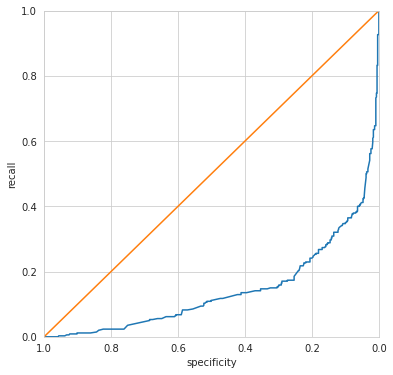

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y, logit_reg.predict_proba(X)[:,0], pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(6, 6), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

In [23]:
pred = logit_reg.predict(x_test)
pred_y = logit_reg.predict(x_test) == 1
true_y = y_test == 1
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

In [24]:
conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)],
[np.sum(false_pos), np.sum(true_neg)]],
index=['Y = 1', 'Y = 0'],
columns=['Yhat = 1', 'Yhat = 0'])
conf_mat

,Yhat = 1,Yhat = 0
Y = 1,61,30
Y = 0,24,108


In [25]:
conf_mat = confusion_matrix(y_test, logit_reg.predict(x_test))
print('Precision=', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall=', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity=', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision= 0.782608695652174
Recall= 0.8181818181818182
Specificity= 0.6703296703296703


Text(0, 0.5, 'recall')

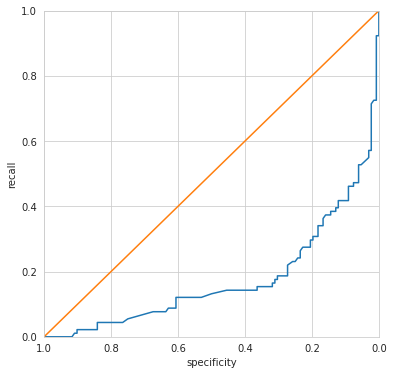

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, logit_reg.predict_proba(x_test)[:,0], pos_label=1)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
ax = roc_df.plot(x='specificity', y='recall', figsize=(6, 6), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

In [27]:
from  sklearn.ensemble import RandomForestClassifier 

<AxesSubplot:xlabel='n'>

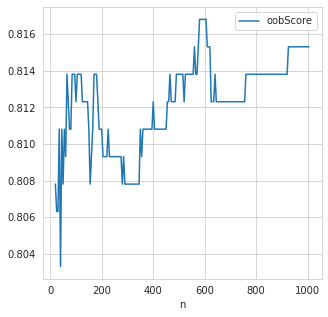

In [28]:
n_estimator = list(range(20, 1010, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, criterion='entropy',
                                max_depth=5, random_state=1, oob_score=True)
    rf.fit(X=x_train,y=y_train)
    oobScores.append(rf.oob_score_)

df = pd.DataFrame({ 'n': n_estimator, 'oobScore': oobScores })
df.plot(x='n', y='oobScore',figsize=(5,5))

<AxesSubplot:xlabel='n'>

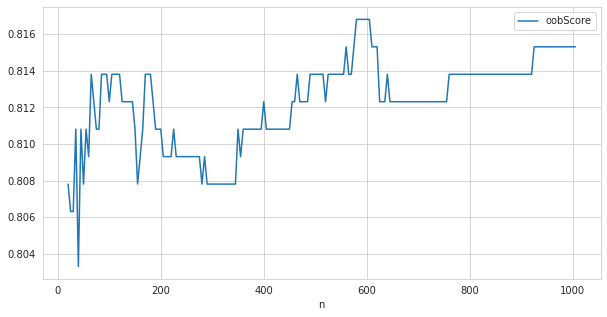

In [29]:
df.plot(x='n', y='oobScore',figsize=(10,5))

In [30]:
rf = RandomForestClassifier(n_estimators=30, random_state=1, oob_score=True)
rf.fit(X=x_train,y=y_train)

RandomForestClassifier(n_estimators=30, oob_score=True, random_state=1)

In [31]:
predictions = x_train.copy()
predictions['prediction'] = rf.predict(x_train)
predictions.head()


,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_male,Embarked_Q,Embarked_S,Fare,prediction
318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,164.8667,1
705,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,26.0000,0
347,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,16.1000,1
490,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,19.9667,0
441,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,9.5000,0


In [32]:
#confusion matrix
y_hat=predictions['prediction']
conf_mat_rf=confusion_matrix(y_true=y_train ,y_pred=y_hat)
conf_mat_rf

array([[403,  14],
       [ 30, 219]])

In [33]:
print('Precision=', conf_mat_rf[0, 0] / sum(conf_mat_rf[:, 0]))
print('Recall=', conf_mat_rf[0, 0] / sum(conf_mat_rf[0, :]))
print('Specificity=', conf_mat_rf[1, 1] / sum(conf_mat_rf[1, :]))

Precision= 0.930715935334873
Recall= 0.9664268585131894
Specificity= 0.8795180722891566


In [34]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...]

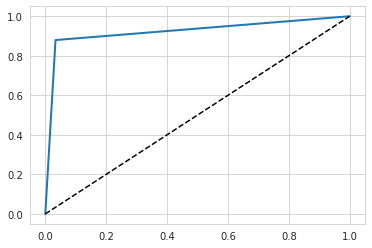

In [35]:
y_hat=predictions['prediction']
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_hat)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [36]:
predictions_test = x_test.copy()
predictions_test['prediction'] = rf.predict(x_test)
predictions_test.head()

,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_male,Embarked_Q,Embarked_S,Fare,prediction
14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.8542,1
159,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,69.5500,0
763,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,120.0000,1
741,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,78.8500,0
483,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.5875,0


In [37]:
y_hat=predictions_test['prediction']
conf_mat_rft=confusion_matrix(y_true=y_test ,y_pred=y_hat)
conf_mat_rft

array([[115,  17],
       [ 30,  61]])

In [38]:
print('Precision=', conf_mat_rft[0, 0] / sum(conf_mat_rft[:, 0]))
print('Recall=', conf_mat_rft[0, 0] / sum(conf_mat_rft[0, :]))
print('Specificity=', conf_mat_rft[1, 1] / sum(conf_mat_rft[1, :]))

Precision= 0.7931034482758621
Recall= 0.8712121212121212
Specificity= 0.6703296703296703


**Cross Validation**

In [39]:
from collections import defaultdict
rf = RandomForestClassifier(n_estimators=45)
scores = defaultdict(list)

In [40]:
from sklearn.metrics import accuracy_score
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X,Y, test_size=0.3)
    rf.fit(train_X, train_y)
    acc = accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        for column in X.columns:
            X_t = valid_X.copy()
            X_t[column] = np.random.permutation(X_t[column].values)
            shuff_acc = accuracy_score(valid_y, rf.predict(X_t))
            scores[column].append((acc-shuff_acc)/acc)

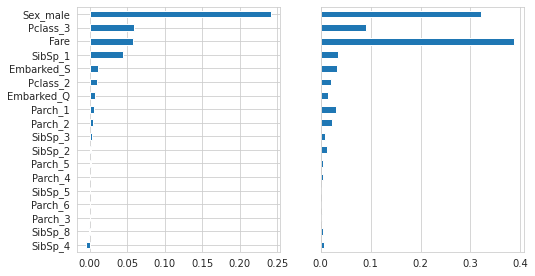

In [41]:
df = pd.DataFrame({
    'feature': X.columns,
    'Accuracy decrease': [np.mean(scores[column]) for column in X.columns],
    'Gini decrease': rf.feature_importances_,
})
df = df.sort_values('Accuracy decrease')
fig, axes = plt.subplots(ncols=2, figsize=(8, 4.5))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease',
             legend=False, ax=axes[0])
ax.set_ylabel('')
ax = df.plot(kind='barh', x='feature', y='Gini decrease',
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

In [42]:
from sklearn.model_selection import train_test_split
x_train_, x_valid_, y_train_, y_valid_ = train_test_split(x_train,y_train, 
                                                          test_size=.25,random_state=41)

In [43]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks=myCallback()

model=tf.keras.models.Sequential([
     tf.keras.layers.Dense(18,input_shape=[18], activation=tf.nn.relu),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)   
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy']
             )

2022-08-30 16:29:32.950654: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
model.fit(x_train,y_train, epochs=100, batch_size=20,
          validation_data=(x_valid_, y_valid_))

2022-08-30 16:29:33.208873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.7479 - binary_accuracy: 0.6411 - val_loss: 0.6467 - val_binary_accuracy: 0.6347
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6149 - binary_accuracy: 0.6652 - val_loss: 0.5958 - val_binary_accuracy: 0.7066
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6417 - binary_accuracy: 0.6772 - val_loss: 0.5736 - val_binary_accuracy: 0.7066
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5728 - binary_accuracy: 0.6982 - val_loss: 0.5550 - val_binary_accuracy: 0.7126
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5517 - binary_accuracy: 0.7027 - val_loss: 0.5472 - val_binary_accuracy: 0.7485
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5537 - binary_accuracy: 0.7087 - val_loss: 0.5135 - val_binary_accuracy: 0.7186
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - lo

In [45]:
predictions = x_train.copy()
predictions['prediction'] = model.predict(x_train)
predictions.head()

,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_male,Embarked_Q,Embarked_S,Fare,prediction
318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,164.8667,0.949245
705,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,26.0000,0.151186
347,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,16.1000,0.472451
490,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,19.9667,0.099957
441,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,9.5000,0.106655


In [46]:
y_hat=predictions['prediction']
conf_mat_tf=confusion_matrix(y_true=y_train ,y_pred=round(y_hat))
conf_mat_tf

array([[373,  44],
       [ 80, 169]])

In [47]:
print('Precision=', conf_mat_tf[0, 0] / sum(conf_mat_tf[:, 0]))
print('Recall=', conf_mat_tf[0, 0] / sum(conf_mat_tf[0, :]))
print('Specificity=', conf_mat_tf[1, 1] / sum(conf_mat_tf[1, :]))

Precision= 0.8233995584988962
Recall= 0.894484412470024
Specificity= 0.678714859437751


In [48]:
predictions_test = x_test.copy()
predictions_test['prediction'] = model.predict(x_test)
predictions_test.head()

,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_male,Embarked_Q,Embarked_S,Fare,prediction
14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.8542,0.533148
159,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,69.5500,0.011976
763,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,120.0000,0.920407
741,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,78.8500,0.324934
483,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.5875,0.512650


In [49]:
y_hat=predictions_test['prediction']
conf_mat_tf=confusion_matrix(y_true=y_test ,y_pred=round(y_hat))
conf_mat_tf

array([[113,  19],
       [ 34,  57]])

In [50]:
print('Precision=', conf_mat_tf[0, 0] / sum(conf_mat_tf[:, 0]))
print('Recall=', conf_mat_tf[0, 0] / sum(conf_mat_tf[0, :]))
print('Specificity=', conf_mat_tf[1, 1] / sum(conf_mat_tf[1, :]))

Precision= 0.7687074829931972
Recall= 0.8560606060606061
Specificity= 0.6263736263736264


In [51]:
pred_lr=pd.DataFrame(logit_reg.predict(X))
pred_rf=pd.DataFrame(rf.predict(X))
pred_tf=pd.DataFrame(model.predict(X))

"""
pred_dict= {
    'Pred_logit':logit_reg.predict(X),
    'Pred_rf':rf.predict(X),
    'Pred_tf':model.predict(X)
}
perd_df= pd.Dataframe(pred_dict)
"""
Merge_pred=pd.concat([pred_lr,pred_rf,(round(pred_tf))], axis=1)
Merge_pred.head()

,0,0,0
0,0,0,0.0
1,1,1,1.0
2,1,1,1.0
3,1,1,1.0
4,0,0,0.0


In [52]:
FInal_pred=Merge_pred.mode(axis=1)

In [53]:
y_hat=FInal_pred
conf_mat_f=confusion_matrix(y_true=Y ,y_pred=round(y_hat))
conf_mat_f

array([[487,  62],
       [107, 233]])

In [54]:
print('Precision=', conf_mat_f[0, 0] / sum(conf_mat_f[:, 0]))
print('Recall=', conf_mat_f[0, 0] / sum(conf_mat_f[0, :]))
print('Specificity=', conf_mat_f[1, 1] / sum(conf_mat_f[1, :]))

Precision= 0.8198653198653199
Recall= 0.8870673952641166
Specificity= 0.6852941176470588


In [55]:
T_ts = pd.read_csv(r'/kaggle/input/titanic/test.csv')
T_ts.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
print(T_ts.shape)
T_ts.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
#Finding the mean of the column having NaN
mean_value=T_ts['Fare'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
T_ts['Fare'].fillna(value=mean_value, inplace=True)

In [58]:
T_ts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [59]:
subset=['Pclass', 'Parch','SibSp', 'Sex','Embarked', 'Fare']
T_ts_sub=T_ts[subset]

T_ts_sub=T_ts_sub.dropna()
print(T_ts_sub.shape)
T_ts_sub.head()

(418, 6)


,Pclass,Parch,SibSp,Sex,Embarked,Fare
0,3,0,0,male,Q,7.8292
1,3,0,1,female,S,7.0000
2,2,0,0,male,Q,9.6875
3,3,0,0,male,S,8.6625
4,3,1,1,female,S,12.2875


In [60]:
predictors=['Pclass', 'Parch','SibSp', 'Sex','Embarked', 'Fare']
subs=['Pclass', 'Parch','SibSp', 'Sex','Embarked']
T_ts_subss=T_ts_sub[subs]
Xt=pd.get_dummies(T_ts_subss,drop_first=True, columns=T_tr_subss.columns)
Xt=pd.concat([Xt, T_ts_sub[['Fare']]], axis=1)
Xt.head()

,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_male,Embarked_Q,Embarked_S,Fare
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,7.8292
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,7.0000
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,9.6875
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,8.6625
4,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,12.2875


In [61]:
print(Xt.columns)
print(X.columns)

Index(['Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Fare'],
      dtype='object')
Index(['Pclass_2', 'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Fare'],
      dtype='object')


In [62]:
Xt=Xt.drop(['Parch_9'],axis=1)

In [63]:
pred_lr=pd.DataFrame(logit_reg.predict(Xt))
pred_rf=pd.DataFrame(rf.predict(Xt))
pred_tf=pd.DataFrame(model.predict(Xt))

Merge_pred=pd.concat([pred_lr,pred_rf,(round(pred_tf))], axis=1)
Merge_pred.head()

,0,0,0
0,0,0,0.0
1,1,0,1.0
2,0,0,0.0
3,0,0,0.0
4,1,1,1.0


In [64]:
Merge_one=pd.DataFrame(Merge_pred.mode(axis=1))

In [65]:
Merge_one=pd.concat([T_ts.iloc[:,0],Merge_one], axis=1)

In [66]:
Merge_one.columns=['PassengerId','Survived' ]
Merge_one

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [67]:
Merge_one.to_csv('submission.csv')

In [68]:
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/working/__notebook__.ipynb
/kaggle/working/submission.csv
